In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [2]:
%run ./Combine_csv.ipynb

In [3]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [4]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Technology\Combined CSV\ "
suffix_dir = 'combined_technology-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [5]:
today_csv

'C:\\Users\\drago\\Documents\\GitHub\\Summer-Project\\Technology\\Combined CSV\\combined_technology-2019-06-03.csv'

In [6]:
technology = pd.read_csv(today_csv)

In [7]:
technology.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Facebook in talks with US regulator over digit...,2019-06-03,14:40:00,https://www.hindustantimes.com/tech/facebook-i...
1,Hindiustan Times,US-based engineers’ body lifts curbs on Huawei...,2019-06-03,14:36:00,https://www.hindustantimes.com/tech/us-based-e...
2,Hindiustan Times,OPPO shows off its upcoming phone with under-d...,2019-06-03,14:29:00,https://www.hindustantimes.com/tech/oppo-shows...
3,Hindiustan Times,OnePlus Bullets Wireless 2 review: OnePlus 7 c...,2019-06-03,13:37:00,https://www.hindustantimes.com/tech/oneplus-bu...
4,Hindiustan Times,"Realme 3 Pro goes on open sale: Price, specifi...",2019-06-03,11:37:00,https://www.hindustantimes.com/tech/realme-3-p...


In [8]:
technology.shape

(144, 5)

In [9]:
#df=technology[technology['Date']==Today_date]
df=technology

Heading = df['Heading']

In [10]:
df.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Facebook in talks with US regulator over digit...,2019-06-03,14:40:00,https://www.hindustantimes.com/tech/facebook-i...
1,Hindiustan Times,US-based engineers’ body lifts curbs on Huawei...,2019-06-03,14:36:00,https://www.hindustantimes.com/tech/us-based-e...
2,Hindiustan Times,OPPO shows off its upcoming phone with under-d...,2019-06-03,14:29:00,https://www.hindustantimes.com/tech/oppo-shows...
3,Hindiustan Times,OnePlus Bullets Wireless 2 review: OnePlus 7 c...,2019-06-03,13:37:00,https://www.hindustantimes.com/tech/oneplus-bu...
4,Hindiustan Times,"Realme 3 Pro goes on open sale: Price, specifi...",2019-06-03,11:37:00,https://www.hindustantimes.com/tech/realme-3-p...


In [11]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [12]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopset = set(stopwords.words('english'))

In [14]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [15]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [17]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [18]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [19]:
 Heading_tokenized[:10]    # 10 out of all

['facebook',
 'in',
 'talks',
 'with',
 'us',
 'regulator',
 'over',
 'digital',
 'currency',
 'plans']

In [20]:

Heading_stemmed[:10]   # 10 out of all

['facebook',
 'in',
 'talk',
 'with',
 'us',
 'regul',
 'over',
 'digit',
 'currenc',
 'plan']

In [21]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [22]:
words_frame.head(10)

,words
facebook,facebook
in,in
talk,talks
with,with
us,us
regul,regulator
over,over
digit,digital
currenc,currency
plan,plans


TF-IDF

In [23]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [24]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [25]:
print(tfidf_matrix.shape)

(144, 3271)


In [26]:
print(tfidf_matrix[0])

  (0, 852)	0.16217568082756315
  (0, 2789)	0.21986271589239584
  (0, 2295)	0.2029903397470391
  (0, 710)	0.2029903397470391
  (0, 646)	0.21986271589239584
  (0, 2063)	0.1910191983599795
  (0, 2330)	0.18173365971091848
  (0, 868)	0.21986271589239584
  (0, 2790)	0.21986271589239584
  (0, 2296)	0.21986271589239584
  (0, 712)	0.21986271589239584
  (0, 647)	0.21986271589239584
  (0, 2066)	0.21986271589239584
  (0, 869)	0.21986271589239584
  (0, 2791)	0.21986271589239584
  (0, 2297)	0.21986271589239584
  (0, 713)	0.21986271589239584
  (0, 648)	0.21986271589239584
  (0, 870)	0.21986271589239584
  (0, 2792)	0.21986271589239584
  (0, 2298)	0.21986271589239584
  (0, 714)	0.21986271589239584


In [27]:
vectorizer.get_feature_names()[:] 

["'s",
 "'s actual",
 "'s actual harm",
 "'s actual harm secur",
 "'s camera",
 "'s camera genuin",
 "'s camera genuin surpris",
 "'s expect",
 "'s fastest",
 "'s fastest camera",
 "'s fastest camera shoot",
 "'s final",
 "'s final game",
 "'s final game ace",
 "'s insan",
 "'s insan video",
 "'s just",
 "'s just 4g",
 "'s just 4g download",
 "'s nod",
 "'s paid",
 "'s pop-up",
 "'s pop-up camera",
 "'s pop-up camera work",
 "'s realiz",
 "'s realiz week",
 "'s thank",
 "'s thank dual-screen",
 "'s thank dual-screen design",
 "'s wwdc",
 "'s wwdc invit",
 "'s wwdc invit begin",
 '100w',
 '100w super',
 '100w super charg',
 '100w super charg phone',
 '12gb',
 '12gb ram',
 '12gb ram model',
 '12gb ram model work',
 '150mb',
 '150mb 200mb',
 '1st',
 '1st decis',
 '1st decis aid',
 '1st decis aid famili',
 '200mb',
 '2gb',
 '2gb data',
 '2gb data daili',
 '2gb data daili day',
 '3.5mm',
 '3.5mm headphon',
 '3.5mm headphon jack',
 '3.5mm headphon jack report',
 '30-day',
 '30-day exchang',


In [28]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [29]:
from sklearn.metrics.pairwise import cosine_similarity


In [30]:
dist = cosine_similarity(tfidf_matrix)

In [31]:
dist.shape

(144, 144)

In [32]:
print(dist)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.03157494 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.03157494 0.         ... 1.         0.         0.03677495]
 [0.         0.         0.         ... 0.         1.         0.01901619]
 [0.         0.         0.         ... 0.03677495 0.01901619 1.        ]]


## K-Means

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [34]:
n_clusters = list (range (14,20))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 14, silhouette score is 0.011128891965880856)
For n = 15, silhouette score is 0.013944669805853892)
For n = 16, silhouette score is 0.022307437117523254)
For n = 17, silhouette score is 0.016605785165116595)
For n = 18, silhouette score is 0.019499798170458424)
For n = 19, silhouette score is 0.016598130693635908)


In [35]:
n_score

14

In [36]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
clusters = km.labels_.tolist()

In [38]:
df['Cluster'] = clusters

In [39]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [40]:
df['Cluster'].value_counts()

4     38
6     15
12    12
9     12
5     12
8      9
7      8
1      8
11     7
2      6
13     5
10     5
3      4
0      3
Name: Cluster, dtype: int64

## Plotting the points

In [41]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [42]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13'}


In [43]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#C41239', 1: '#DF3FB2', 2: '#5BEA9D', 3: '#6FBCB5', 4: '#25E0D3', 5: '#969EF6', 6: '#4DA8AB', 7: '#909EE8', 8: '#F334D8', 9: '#8BF224', 10: '#36DBAC', 11: '#B90E3B', 12: '#509498', 13: '#ED942B'}


In [44]:
type(cluster_colors)

dict

In [45]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,-0.000337,0.001722,12,Facebook in talks with US regulator over digit...
1,-0.000247,0.000049,4,US-based engineers’ body lifts curbs on Huawei...
2,0.001780,-0.001160,1,OPPO shows off its upcoming phone with under-d...
3,-0.001987,-0.001895,11,OnePlus Bullets Wireless 2 review: OnePlus 7 c...
4,0.001158,0.004904,7,"Realme 3 Pro goes on open sale: Price, specifi..."


In [46]:
groups = df_plot.groupby('label')

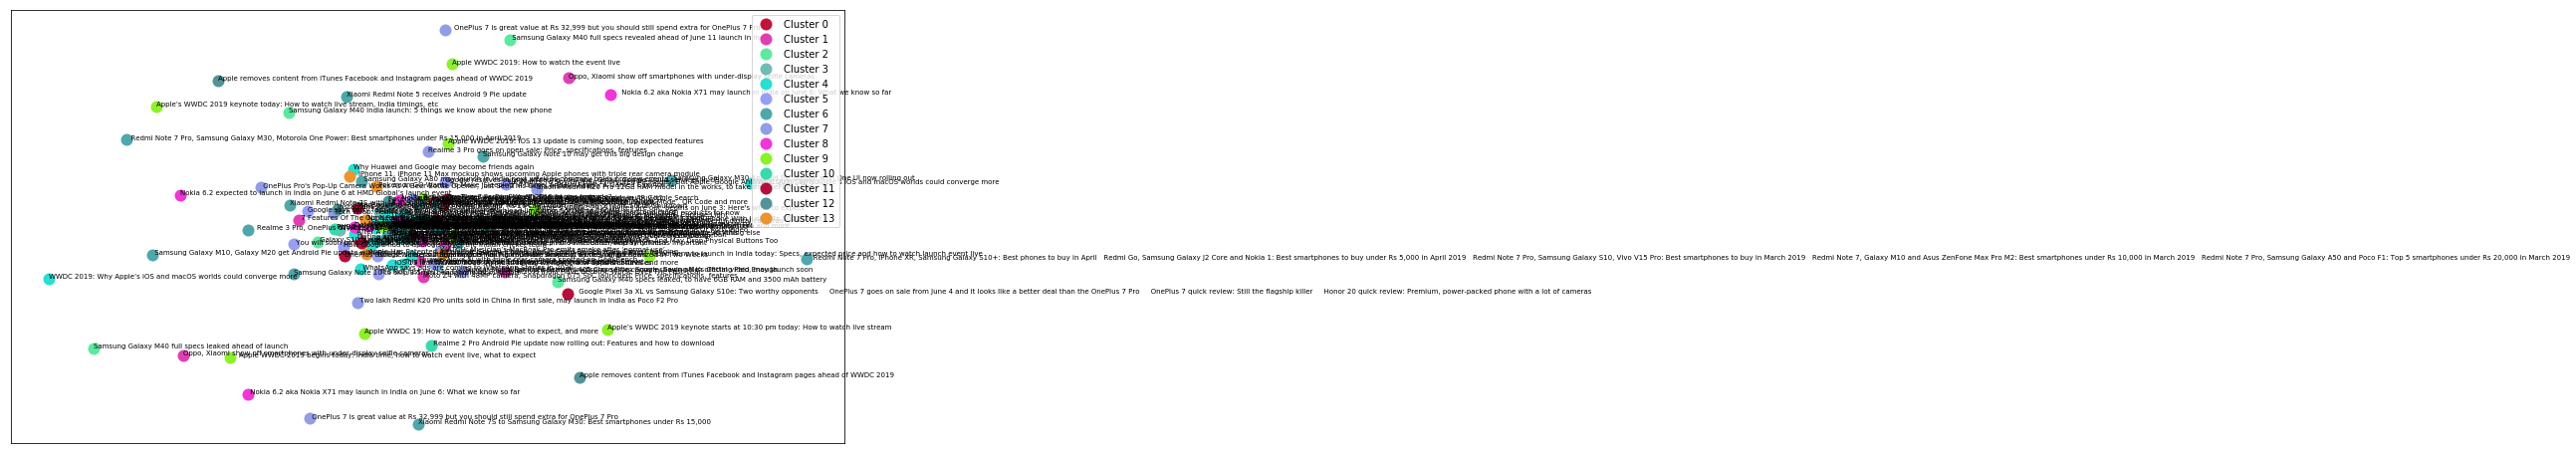

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [48]:
#centers = np.array(km.cluster_centers_)

In [49]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [50]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [51]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [52]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [53]:
#df.sort_values(by='Cluster')

In [54]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [55]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [56]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [57]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [58]:
#df_less

In [59]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [60]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [61]:
#Result

In [62]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [63]:
#df_more

In [64]:
#Result = Result.append(df_more)

In [65]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [66]:
##Result

In [67]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [68]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [69]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,Hindiustan Times,"Spotify testing ‘Social Listening’, lets multi...",2019-06-01,16:49:00,https://www.hindustantimes.com/tech/spotify-te...,0
1,Hindiustan Times,Chinese database leaks 42.5 million records fr...,2019-05-30,12:52:00,https://www.hindustantimes.com/tech/chinese-da...,0
2,Time of India,Dating app Tinder starts testing a ‘hack’ to g...,2019-06-01,03:25:07,https://timesofindia.indiatimes.com/gadgets-ne...,0
3,India Times,7 Features Of The Oppo Reno's Camera That May...,2019-06-03,14:44,https://www.indiatimes.com/technology/gadgets/...,1
4,India Today,Xiaomi phone with in-display selfie camera sh...,2019-06-03,14:44,https://timesofindia.indiatimes.com/technology...,1


In [70]:
vectorizer = TfidfVectorizer()

In [71]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [72]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [73]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.36, 0.36, 0.38]


[0.18, 0.25, 0.17, 0.17, 0.16, 0.36, 0.28, 0.36]


[0.27, 0.19, 0.32, 0.27, 0.36, 0.39]


[0.29, 0.32, 0.33, 0.25]


[0.05, 0.03, 0.05, 0.05, 0.07, 0.04, 0.04, 0.03, 0.05, 0.05, 0.04, 0.05, 0.05, 0.03, 0.04, 0.04, 0.03, 0.04, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04, 0.07, 0.04, 0.07, 0.05, 0.04, 0.04, 0.03, 0.04, 0.04, 0.04, 0.04, 0.06, 0.04]


[0.11, 0.13, 0.12, 0.14, 0.15, 0.12, 0.13, 0.1, 0.13, 0.14, 0.13, 0.1]


[0.13, 0.24, 0.17, 0.23, 0.13, 0.1, 0.19, 0.24, 0.08, 0.15, 0.16, 0.15, 0.12, 0.12, 0.18]


[0.2, 0.28, 0.16, 0.17, 0.23, 0.14, 0.16, 0.28]


[0.16, 0.17, 0.18, 0.31, 0.15, 0.26, 0.16, 0.13, 0.31]


[0.3, 0.27, 0.14, 0.21, 0.12, 0.26, 0.16, 0.2, 0.11, 0.31, 0.35, 0.23]


[0.25, 0.29, 0.24, 0.28, 0.26]


[0.17, 0.23, 0.21, 0.18, 0.22, 0.26, 0.19]


[0.12, 0.23, 0.23, 0.1, 0.11, 0.11, 0.11, 0.12, 0.13, 0.1, 0.12, 0.12]


[0.25, 0.29, 0.3, 0.23, 0.28]




In [74]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [75]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.366667
1     0.241250
2     0.300000
3     0.297500
4     0.045526
5     0.125000
6     0.159333
7     0.202500
8     0.203333
9     0.221667
10    0.264000
11    0.208571
12    0.133333
13    0.270000
Name: cluster_similarity_value, dtype: float64

In [76]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Hindiustan Times,"Spotify testing ‘Social Listening’, lets multi...",2019-06-01,16:49:00,https://www.hindustantimes.com/tech/spotify-te...,0,0.36
1,Hindiustan Times,Chinese database leaks 42.5 million records fr...,2019-05-30,12:52:00,https://www.hindustantimes.com/tech/chinese-da...,0,0.36
2,Time of India,Dating app Tinder starts testing a ‘hack’ to g...,2019-06-01,03:25:07,https://timesofindia.indiatimes.com/gadgets-ne...,0,0.38
3,India Times,7 Features Of The Oppo Reno's Camera That May...,2019-06-03,14:44,https://www.indiatimes.com/technology/gadgets/...,1,0.18
4,India Today,Xiaomi phone with in-display selfie camera sh...,2019-06-03,14:44,https://timesofindia.indiatimes.com/technology...,1,0.25
5,Hindiustan Times,Xiaomi Mi Band 4 leaked images confirm colour ...,2019-06-01,16:34:00,https://www.hindustantimes.com/tech/xiaomi-mi-...,1,0.17
6,Hindiustan Times,"Moto Z4 with 48MP camera, Snapdragon 675 SoC l...",2019-05-31,12:54:00,https://www.hindustantimes.com/tech/moto-z4-wi...,1,0.17
7,Time of India,Huawei Nova 5i with triple rear camera spotted...,2019-05-31,09:42:56,https://timesofindia.indiatimes.com/gadgets-ne...,1,0.16
8,Indian Express,"Oppo, Xiaomi show off smartphones with under-d...",2019-06-03,14:18:21:00,https://indianexpress.com/article/technology/m...,1,0.36
9,Hindiustan Times,OPPO shows off its upcoming phone with under-d...,2019-06-03,14:29:00,https://www.hindustantimes.com/tech/oppo-shows...,1,0.28


In [77]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [78]:
col=df_sorted.columns

In [79]:
temp_more =[]
temp_less  =[]

In [80]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
            temp_less.append(cluster.iloc[i])
        else:
            temp_more.append(cluster.iloc[i])

In [81]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [82]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [83]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,2,Time of India,Dating app Tinder starts testing a ‘hack’ to g...,2019-06-01,03:25:07,https://timesofindia.indiatimes.com/gadgets-ne...,0,0.38
1,10,Indian Express,"Oppo, Xiaomi show off smartphones with under-d...",2019-06-03,2:18:21 pm,https://indianexpress.com/article/technology/m...,1,0.36
2,15,India Today,Samsung Galaxy M40 full specs revealed ahead ...,2019-06-03,14:44,https://timesofindia.indiatimes.com/technology...,2,0.36
3,18,Hindiustan Times,WWDC 2019: Apple to reveal its next era of app...,2019-06-01,13:20:00,https://www.hindustantimes.com/tech/wwdc-2019-...,3,0.32
4,23,India Times,Mackenzie Bezos Has Pledged To Give Half Of H...,2019-06-03,14:44,https://www.indiatimes.com/technology/news/mac...,4,0.05


In [84]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [85]:
Result = Result.append(df_less_similar)

In [86]:
Result = Result.sort_values(by='Cluster')

In [87]:
Result=Result.reset_index().drop(['index'],axis=1)

In [88]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Time of India,Dating app Tinder starts testing a ‘hack’ to g...,2019-06-01,03:25:07,https://timesofindia.indiatimes.com/gadgets-ne...,0,0.38
1,Hindiustan Times,Chinese database leaks 42.5 million records fr...,2019-05-30,12:52:00,https://www.hindustantimes.com/tech/chinese-da...,0,0.36
2,Hindiustan Times,"Spotify testing ‘Social Listening’, lets multi...",2019-06-01,16:49:00,https://www.hindustantimes.com/tech/spotify-te...,0,0.36
3,India Times,7 Features Of The Oppo Reno's Camera That May...,2019-06-03,14:44,https://www.indiatimes.com/technology/gadgets/...,1,0.18
4,Hindiustan Times,Xiaomi Mi Band 4 leaked images confirm colour ...,2019-06-01,16:34:00,https://www.hindustantimes.com/tech/xiaomi-mi-...,1,0.17
5,Time of India,Huawei Nova 5i with triple rear camera spotted...,2019-05-31,09:42:56,https://timesofindia.indiatimes.com/gadgets-ne...,1,0.16
6,Hindiustan Times,"Moto Z4 with 48MP camera, Snapdragon 675 SoC l...",2019-05-31,12:54:00,https://www.hindustantimes.com/tech/moto-z4-wi...,1,0.17
7,Indian Express,"Oppo, Xiaomi show off smartphones with under-d...",2019-06-03,2:18:21 pm,https://indianexpress.com/article/technology/m...,1,0.36
8,India Today,"Galaxy S10: Launch, Expected Specs, Price and...",2019-06-03,14:44,https://timesofindia.indiatimes.com/technology...,2,0.27
9,Time of India,"MacBook Pro reportedly explodes, battery may b...",2019-06-01,03:16:41,https://timesofindia.indiatimes.com/gadgets-ne...,2,0.19


In [89]:
outname ='Technology-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Technology\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [90]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [91]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Time of India,Dating app Tinder starts testing a ‘hack’ to g...,2019-06-01,03:25:07,https://timesofindia.indiatimes.com/gadgets-ne...,0,0.38
1,Hindiustan Times,Chinese database leaks 42.5 million records fr...,2019-05-30,12:52:00,https://www.hindustantimes.com/tech/chinese-da...,0,0.36
2,Hindiustan Times,"Spotify testing ‘Social Listening’, lets multi...",2019-06-01,16:49:00,https://www.hindustantimes.com/tech/spotify-te...,0,0.36
3,India Times,7 Features Of The Oppo Reno's Camera That May...,2019-06-03,14:44,https://www.indiatimes.com/technology/gadgets/...,1,0.18
4,Hindiustan Times,Xiaomi Mi Band 4 leaked images confirm colour ...,2019-06-01,16:34:00,https://www.hindustantimes.com/tech/xiaomi-mi-...,1,0.17
5,Time of India,Huawei Nova 5i with triple rear camera spotted...,2019-05-31,09:42:56,https://timesofindia.indiatimes.com/gadgets-ne...,1,0.16
6,Hindiustan Times,"Moto Z4 with 48MP camera, Snapdragon 675 SoC l...",2019-05-31,12:54:00,https://www.hindustantimes.com/tech/moto-z4-wi...,1,0.17
7,Indian Express,"Oppo, Xiaomi show off smartphones with under-d...",2019-06-03,2:18:21 pm,https://indianexpress.com/article/technology/m...,1,0.36
8,India Today,"Galaxy S10: Launch, Expected Specs, Price and...",2019-06-03,14:44,https://timesofindia.indiatimes.com/technology...,2,0.27
9,Time of India,"MacBook Pro reportedly explodes, battery may b...",2019-06-01,03:16:41,https://timesofindia.indiatimes.com/gadgets-ne...,2,0.19
